## Magic Internet Money

Load libraries

In [1]:
import os, sys
import requests
import pandas as pd
import numpy as np
from datetime import timedelta as td, datetime as dt, timezone
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# Scripts
scripts_module_path = os.path.abspath(os.path.join(os.getcwd(),'..', 'scripts'))
if scripts_module_path not in sys.path:
    sys.path.append(scripts_module_path)
from acquisition import Acquisition as Akw
from handling import getDataFrame, addReversionAndVolatility, addAverages
from viz import createBasicAnalysisPlot

## Import Data

Import Options:

In [2]:
# common keywords
basic_kwargs = dict(granularity='days')

# required for data acquisition
acquisition_kwargs = dict(**basic_kwargs,
                          datetime_from=dt.now() - td(days=523),
                          datetime_till=dt.now(),
                          downloadIfMissing=True,
                          includeOffPeg=True)
# required for the estimation of the reversion rate
reversion_kwargs = dict(**basic_kwargs,
                        windowSize=105,
                        minDataPoints=80,
                        discount_factor = 0.1,
                        sampleError=0.0001,
                        verbose=True)

Import Data

In [3]:
mimusd = getDataFrame(whichData="cg_mim_usd", **acquisition_kwargs)
mimusd = addReversionAndVolatility(mimusd, **reversion_kwargs)

In [4]:
addAverages(mimusd, columns=["price", "rate", "sigma"], com=5, inplace=True)

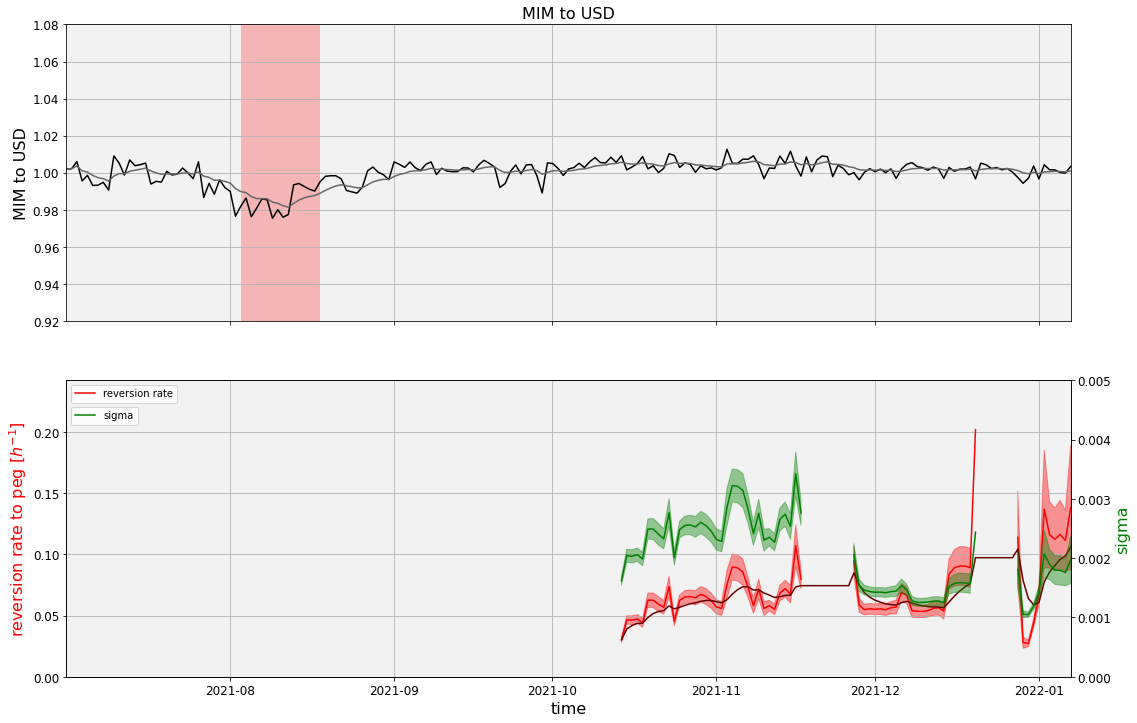

In [5]:
fig, axes, secax = createBasicAnalysisPlot(df=mimusd, title="MIM to USD", price_dev=0.08)
axes[0].plot(mimusd.date, mimusd.price_ewm, color="#666")
axes[1].set_ylim([0,mimusd.rate.max()*(1+0.2)])
axes[1].plot(mimusd.date, mimusd.rate_ewm, color="#600")
axes[0].fill_between(mimusd["date"], 0.90, 1.15, 
                where=(mimusd.price_ewm>1.01) | (mimusd.price_ewm<0.99),
                facecolor='red',
                alpha=0.25)
plt.show()

## Spell Token

In [6]:
spellusd = getDataFrame(whichData="cg_spell_usd", **acquisition_kwargs)

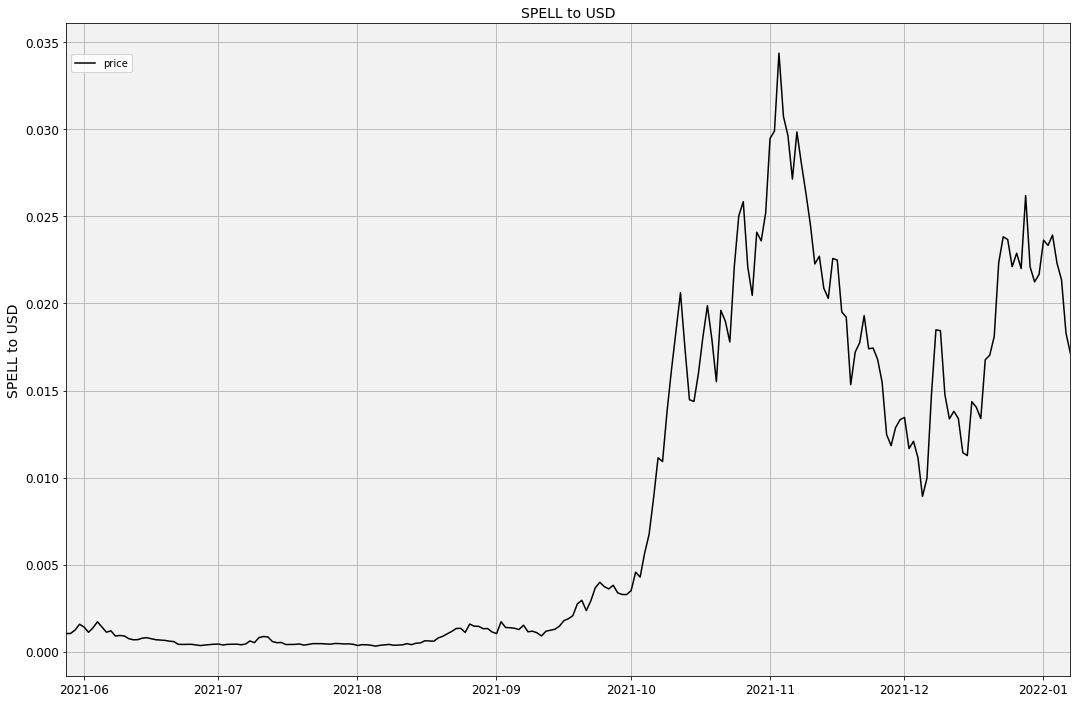

In [7]:
ylabel = "SPELL to USD"
title = ylabel
fontsize = 14
ticksize = 12

fig, axes = plt.subplots(nrows=1,ncols=1,sharex=True)
fig.set_figwidth(18)
fig.set_figheight(12)

axes.plot(spellusd["date"], spellusd["price"], color='black', linestyle='solid')
# axes.plot(spellusd["date"], spellusd["market_cap"], color='blue', linestyle='solid')
axes.set_title(title)
axes.set_ylabel(ylabel)
axes.set_xlim([spellusd.date.min(),spellusd.date.max()])
axes.set_facecolor((0.95, 0.95, 0.95))
axes.yaxis.label.set_fontsize(fontsize) 
axes.title.set_fontsize(fontsize) 
axes.tick_params(axis='both', which='major', labelsize=ticksize)
axes.grid()

axes.legend(labels=["price", "market_cap"], loc=(0.005, 0.925))

plt.show()

## What happends in the case of liquidations

- Which protocols integrate with MIM 
    - [Snowbank DAO (SB)](https://docs.snowbank.finance/)
    - [Wonderland on Avalanche (TIME)](https://docs.wonderland.money/)
    - [PAPA DAO (PAPA)](https://papadao.gitbook.io/)
    - [Tornadao](https://docs.tornadao.finance/)
- What are the collateral of MIM


### Get Holders and Exchanges